# Machine Learning in Python Lab 2: Exploring Image Data

## Dataset: Eye Disease Classification Dataset
https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification/data

# Business Use
This dataset consists of 4217 images of human eyes with different diseases including: Cataracts, Diabetic Retinopathy, and Glaucoma. There is also a set of normal eye images to classify against.

This dataset was collected by healthcare professionals, as documentation of patients eyes, and their diseases.

By studying this dataset we aim to create a classification model, that is able to assist eye healthcare professionals in identifying diseases, when examining a patients eyes. The goal of this model is NOT to replace eye doctors, but instead to provide them with a useful tool to help with diagnoses, and make their job more efficient possibly allowing them to see more patients in a day.

Our prediction model would need to be resistant against false negatives, because these scenarios could lead to delayed treatment possibly leading to permanent vision loss of patients. Flase positives are not as big a deal, because the patient would be healthy, and the models mistake would be caught either by the healthcare professional, or during a follow up appointment.

## Data Preperation

The dataset consists of 4 folders (1 for each classification) with about 1000 photos in each folder. Each image has marked on it if it is a left or right eye. Since we do not want the left/right of the eye to impact our results, we first take all of the right eye images and flip them, so they would be the same orientation as the left eyes

In [1]:
#show  a gallery of 2 images from each data type (left and right)
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random



In [2]:
#Since there were 3 different sources for the images not all of them are marked right/left so this step has been removed from the process

# #read in the files from ./dataset/cataract, ./dataset/diabetic_retinopathy, ./dataset/glaucoma, ./dataset/normal, look for files that have _right in the name, and flip them horizontally, then save them to a new folder. If they have _left in hte name just copy them over to the new folder with no changes
# 
# #set the path to the dataset
# path = "./dataset/"
# 
# #set the path to the new dataset
# new_path = "./processed_dataset/"
# 
# #make the new dataset folder
# os.makedirs
# 
# #loop through the folders in the dataset    
# for folder in os.listdir(path):
#     #make a new folder in the new dataset
#     os.makedirs(new_path + folder)
#     #loop through the files in the folder
#     for file in os.listdir(path + folder):
#         #read in the image
#         img = cv2.imread(path + folder + "/" + file)
#         #if the image has _right in the name, flip it horizontally
#         if "_right" in file:
#             img = cv2.flip(img, 1)
#         #remove the _right or _left from the name
#         file = file.replace("_right", "").replace("_left", "")
#         #save the image to the new folder
#         cv2.imwrite(new_path + folder + "/" + file, img)
        

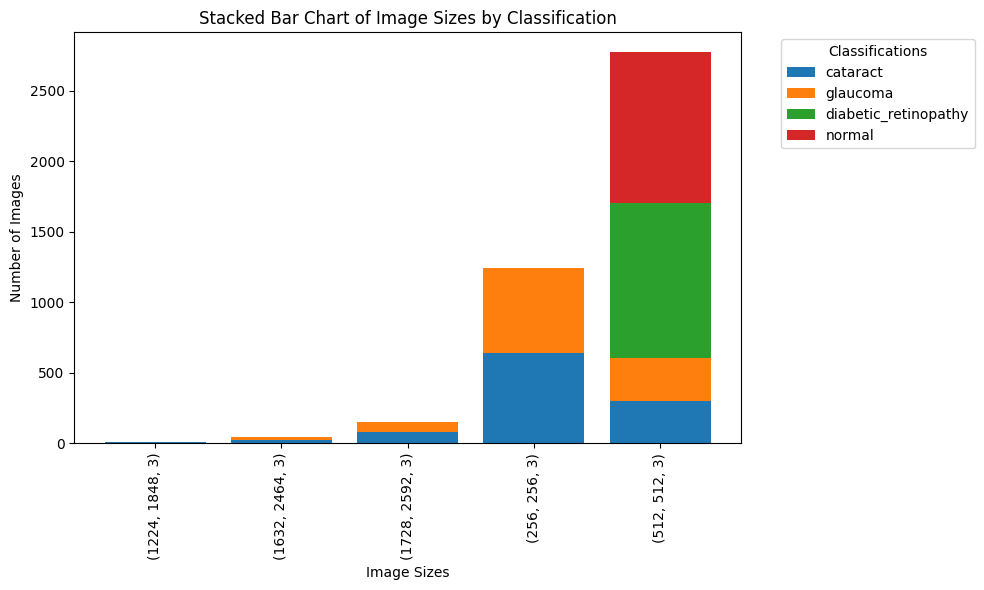

In [3]:
#set the path to the dataset
path = "./dataset/"

def create_stacked_bar_chart(path):
    """
    Create a stacked bar chart of image sizes by classification.  
    Args:
    path (str): Path to the dataset directory containing classification folders.
    """
    # Dictionary to store image size counts
    image_sizes_per_class = {}
    
    # Loop through resized dataset folders
    for folder in os.listdir(path):
        class_path = os.path.join(path, folder)
        if not os.path.isdir(class_path):
            continue  # Skip non-directory files
        
        image_sizes_per_class[folder] = {}

        # Loop through the files in each folder
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            img = cv2.imread(file_path)
            
            if img is None:
                continue  # skip corrupted or unreadable images
            
            # Get the size of the image
            size = str(img.shape)
            
            # Increment count for the image size
            if size in image_sizes_per_class[folder]:
                image_sizes_per_class[folder][size] += 1
            else:
                image_sizes_per_class[folder][size] = 1

    # Plot the stacked bar chart
    all_sizes = sorted(set(size for class_sizes in image_sizes_per_class.values() for size in class_sizes))
    
    bar_data = []
    class_names = list(image_sizes_per_class.keys())

    for class_name in class_names:
        class_counts = [image_sizes_per_class[class_name].get(size, 0) for size in all_sizes]
        bar_data.append(class_counts)

    bar_data = np.array(bar_data)

    fig, ax = plt.subplots(figsize=(10, 6))

    bottoms = np.zeros(len(all_sizes))
    for i, class_name in enumerate(class_names):
        ax.bar(all_sizes, bar_data[i], bottom=bottoms, label=class_name)
        bottoms += bar_data[i]

    plt.xticks(rotation=90)
    plt.xlabel('Image Sizes')
    plt.ylabel('Number of Images')
    plt.title('Stacked Bar Chart of Image Sizes by Classification')
    plt.legend(title='Classifications', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the stacked bar chart function
create_stacked_bar_chart(path)

In [4]:
def count_images_by_dimension(path, max_dimension_threshold=1000):
    """
    Counts valid and removed images in each classification based on the dimension threshold.

    Args:
    path (str): Path to the dataset directory containing classification folders.
    max_dimension_threshold (int): Maximum dimension allowed for valid images. Images with either
                                   width or height greater than this value will be counted as removed.

    Returns:
    pd.DataFrame: DataFrame containing the count of valid and removed images per classification.
    """
    
    # Dictionary to hold the count of valid images per classification
    valid_image_counts = {}
    
    # Dictionary to hold the count of removed images per classification
    removed_image_counts = {}

    # Loop through the folders in the dataset (classifications)
    for folder in os.listdir(path):
        valid_image_counts[folder] = 0
        removed_image_counts[folder] = 0
        folder_path = os.path.join(path, folder)
        
        # Check if it's a directory
        if not os.path.isdir(folder_path):
            continue
        
        # Loop through the files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            
            # If the image is None (e.g., corrupted image), skip it
            if img is None:
                continue
            
            # Check if the image exceeds the maximum allowed dimensions
            height, width = img.shape[:2]
            if height > max_dimension_threshold or width > max_dimension_threshold:
                removed_image_counts[folder] += 1
            else:
                valid_image_counts[folder] += 1

    # Prepare the data for DataFrame
    data = {
        "Classification": valid_image_counts.keys(),
        "Valid Images": valid_image_counts.values(),
        "Removed Images": removed_image_counts.values()
    }

    # Convert to DataFrame and return
    return pd.DataFrame(data)

# Example of calling the function
dataset_path = "./dataset/"
image_counts_df = count_images_by_dimension(dataset_path, max_dimension_threshold=1000)

# Display the DataFrame
image_counts_df

,Classification,Valid Images,Removed Images
0,cataract,938,100
1,glaucoma,906,101
2,diabetic_retinopathy,1098,0
3,normal,1074,0


Since the large (not square) photos are a small subset (And they are not all centered in the rectangle), we will remove them from the dataset, along with ~100 random photos for diabetic retinopathy, and normal to keep the dataset fairly even across classifications. We will also resize the 512x512 images to 256x256 to make the dataset more manageable.

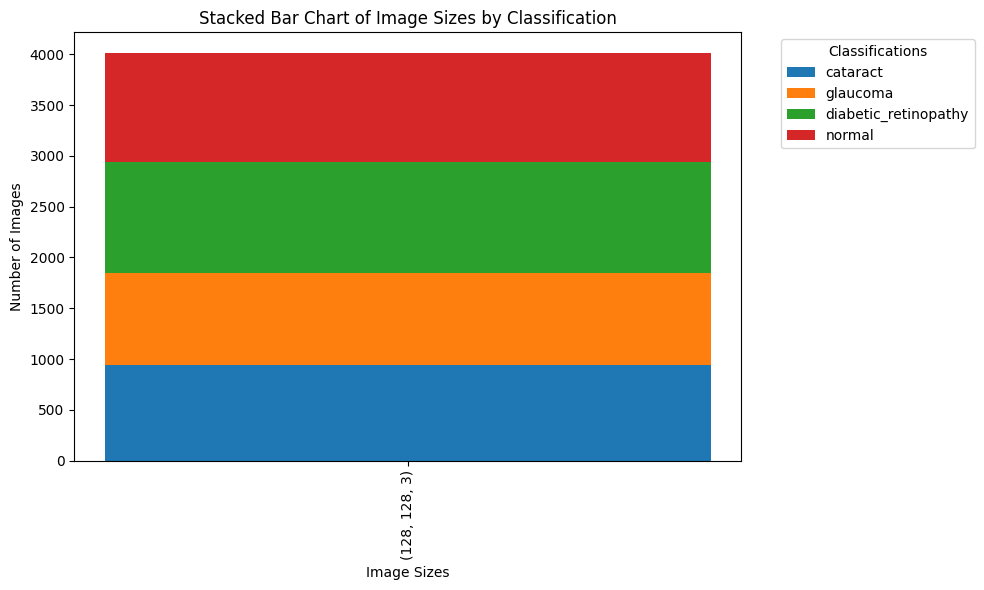

,Classification,Valid Images,Removed Images
0,cataract,938,0
1,glaucoma,906,0
2,diabetic_retinopathy,1098,0
3,normal,1074,0


In [5]:
#set the path to the dataset
path = "./dataset/"

#set the path to the new dataset
new_path = "./resized_dataset/"

# Maximum dimension threshold for removing large images (e.g., 1000 pixels in any dimension)
max_dimension_threshold = 1000

# Number of images to randomly remove from 'Normal' and 'Diabetic Retinopathy' classes
num_remove = 100

# Create the new dataset folder if it doesn't exist
os.makedirs(new_path, exist_ok=True)

# Security consideration: Ensure access is limited to the expected directory
if not os.path.isdir(path):
    raise ValueError("Dataset path is invalid.")

# Function to display before and after images with their sizes
def display_before_after(original_img, resized_img, class_name, file_name):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the original image
    ax[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    original_size = original_img.shape  # Get the original image size
    ax[0].set_title(f'Before - {class_name}/{file_name}\nSize: {original_size[1]}x{original_size[0]}')
    ax[0].axis('off')
    
    # Display the resized image
    ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    resized_size = resized_img.shape  # Get the resized image size (should be 256x256)
    ax[1].set_title(f'After - {class_name}/{file_name}\nSize: {resized_size[1]}x{resized_size[0]}')
    ax[1].axis('off')
    
    plt.show()

# Dictionary to track the number of images removed
removed_image_counts = {
    "large": 0,
    "Normal": 0,
    "Diabetic Retinopathy": 0
}

# Function to remove large images and downsize the rest
def process_images():
    # Loop through the folders in the dataset
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if not os.path.isdir(folder_path):
            continue  # skip non-directory files

        # Make a new folder in the new dataset
        new_folder_path = os.path.join(new_path, folder)
        os.makedirs(new_folder_path, exist_ok=True)

        # Remove large images
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            
            if img is None:
                continue  # skip unreadable or corrupted files

            height, width = img.shape[:2]
            
            # Remove large images
            if height > max_dimension_threshold or width > max_dimension_threshold:
                removed_image_counts["large"] += 1
                continue  # Do not process or save large images

            # Resize the image
            resized_img = cv2.resize(img, (128, 128))

            # Save the resized image to the new folder
            cv2.imwrite(os.path.join(new_folder_path, file), resized_img)

        # Remove additional 100 images from 'Normal' and 'Diabetic Retinopathy'
        if folder in ["Normal", "Diabetic Retinopathy"]:
            files_to_remove = random.sample(files, num_remove)
            for file in files_to_remove:
                file_path = os.path.join(new_folder_path, file)
                if os.path.exists(file_path):
                    os.remove(file_path)
                    removed_image_counts[folder] += 1

# Call the function to process the images
process_images()
create_stacked_bar_chart(new_path)
image_counts_df = count_images_by_dimension(new_path, max_dimension_threshold=1000)

# Display the DataFrame
image_counts_df

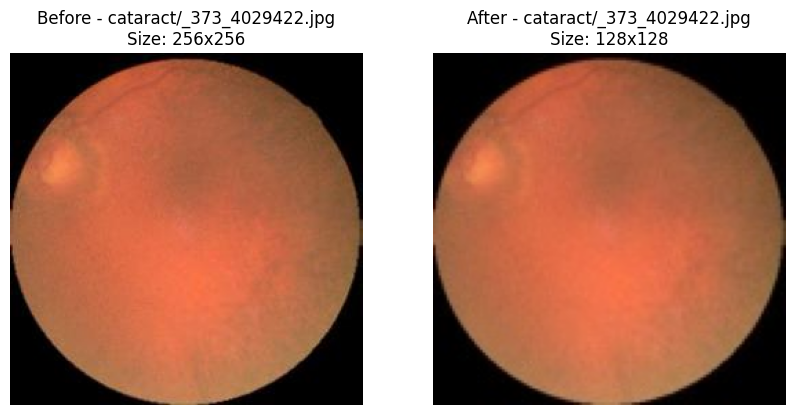

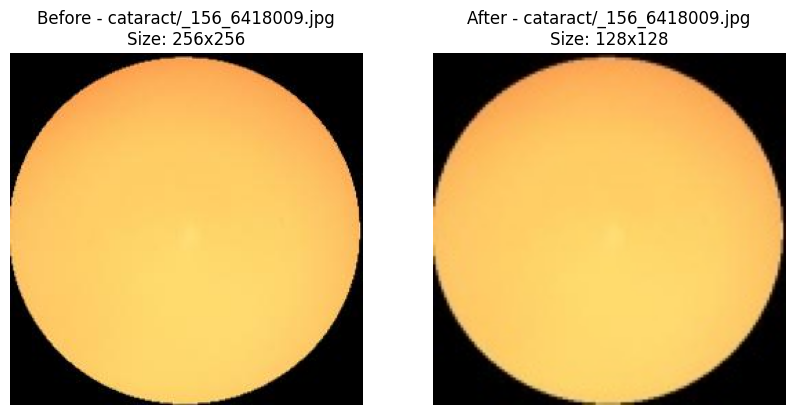

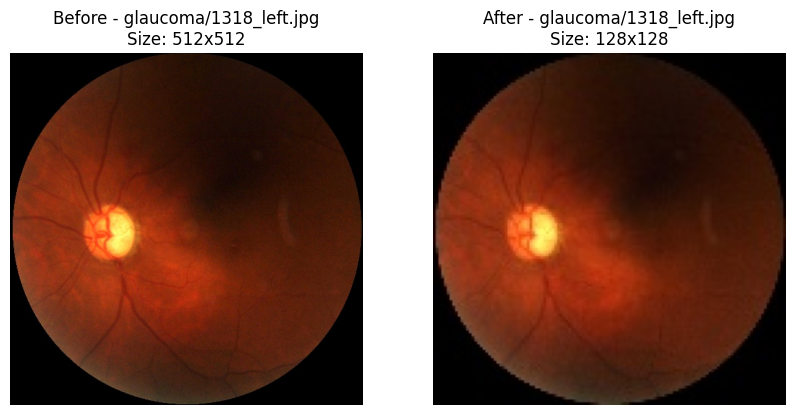

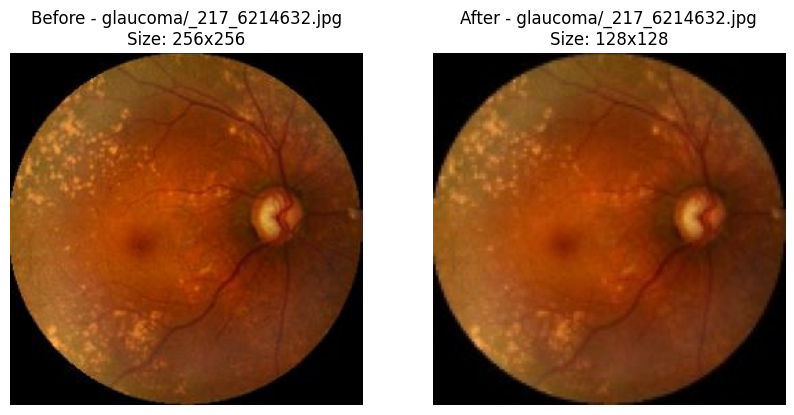

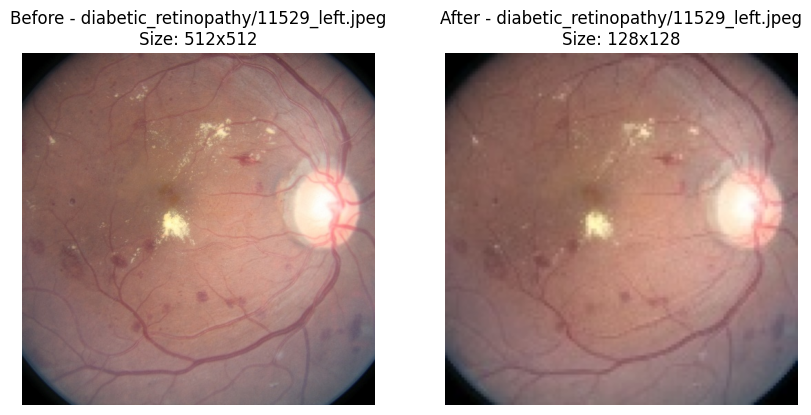

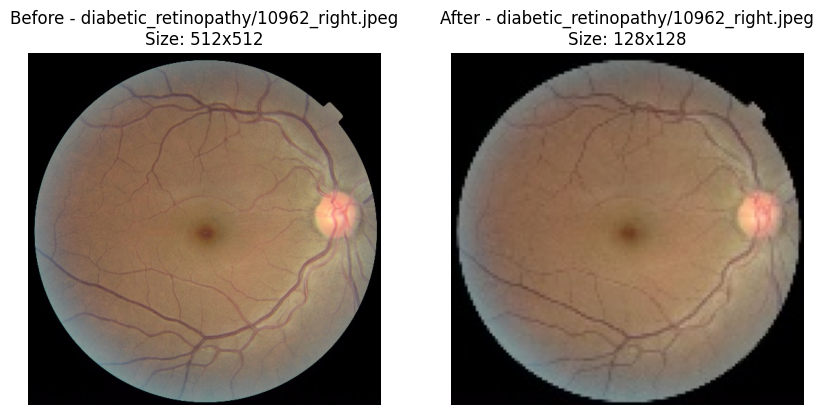

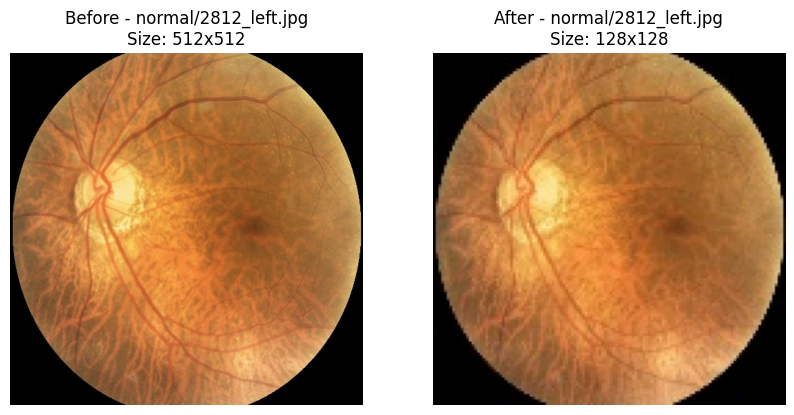

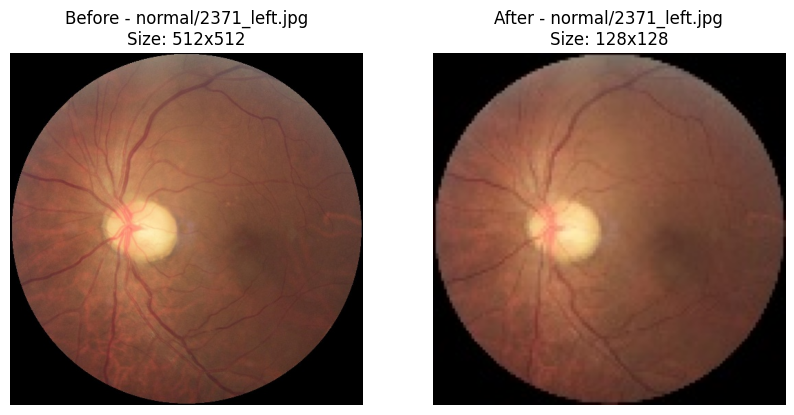

In [6]:

# Function to display before and after images with their sizes
def display_before_after(original_img, resized_img, class_name, file_name):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the original image
    ax[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    original_size = original_img.shape  # Get the original image size
    ax[0].set_title(f'Before - {class_name}/{file_name}\nSize: {original_size[1]}x{original_size[0]}')
    ax[0].axis('off')
    
    # Display the resized image
    ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    resized_size = resized_img.shape  # Get the resized image size (should be 256x256)
    ax[1].set_title(f'After - {class_name}/{file_name}\nSize: {resized_size[1]}x{resized_size[0]}')
    ax[1].axis('off')
    
    plt.show()

def compare_two_images_per_classification(path, new_path):
    """
    Compares two images per classification in the original dataset and the resized dataset by finding images
    with the same name in both datasets and displaying the before-and-after comparison.
    """
    
    # Loop through the folders in the dataset
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        new_folder_path = os.path.join(new_path, folder)

        if not os.path.isdir(folder_path) or not os.path.isdir(new_folder_path):
            continue
        
        # Get the files in both the original and resized dataset folders
        original_files = set(os.listdir(folder_path))
        resized_files = set(os.listdir(new_folder_path))
        
        # Find common files between the two datasets
        common_files = list(original_files.intersection(resized_files))

        # If there are fewer than 2 common files, skip this classification
        if len(common_files) < 2:
            continue
        
        # Randomly select 2 common files
        selected_files = random.sample(common_files, 2)

        # For each selected file, display the before and after comparison
        for file in selected_files:
            original_file_path = os.path.join(folder_path, file)
            resized_file_path = os.path.join(new_folder_path, file)
            
            # Read both images
            original_img = cv2.imread(original_file_path)
            resized_img = cv2.imread(resized_file_path)
            
            if original_img is None or resized_img is None:
                continue  # Skip if either image can't be read
            
            # Display the before and after comparison
            display_before_after(original_img, resized_img, folder, file)

dataset_path = "./dataset/"
resized_dataset_path = "./resized_dataset/"
compare_two_images_per_classification(dataset_path, resized_dataset_path)

In the resized images we can still clearly see features like the veins in the eye, now the images are all 128x128 and ready to be classified!

In [7]:
import cv2
import numpy as np
import os

def load_dataset_as_numpy(path, image_size=(128, 128)):
    """
    Loads a dataset of images into a NumPy array, where each row is a flattened grayscale image.
    
    Args:
    path (str): The path to the dataset.
    image_size (tuple): The size to which each image will be resized. Default is (128, 128).
    
    Returns:
    np.ndarray: A NumPy array where each row is a flattened grayscale image.
    np.ndarray: A NumPy array with the corresponding labels (classification folders).
    """
    images = []
    labels = []

    # Loop through the folders (classifications) in the dataset
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        
        if not os.path.isdir(folder_path):
            continue

        # Loop through the files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            # Read the image
            img = cv2.imread(file_path)
            
            # Skip if the image is unreadable
            if img is None:
                continue
            
            # Convert the image to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Resize the image to the specified size
            img_resized = cv2.resize(img_gray, image_size)
            
            # Flatten the image (linearize)
            img_flattened = img_resized.flatten()
            
            # Append the flattened image to the images list
            images.append(img_flattened)
            
            # Append the label (folder name) to the labels list
            labels.append(folder)
    
    # Convert the lists to NumPy arrays
    images_np = np.array(images)
    labels_np = np.array(labels)
    
    return images_np, labels_np

# Example Usage:
# Load the resized grayscale dataset as NumPy arrays
new_path = './resized_dataset/' 
X_gray, y = load_dataset_as_numpy(new_path)

# Display the shapes of the arrays
print(X_gray.shape, y.shape)


(4016, 16384) (4016,)


## Data Reduction

### Dimensionality Reduction

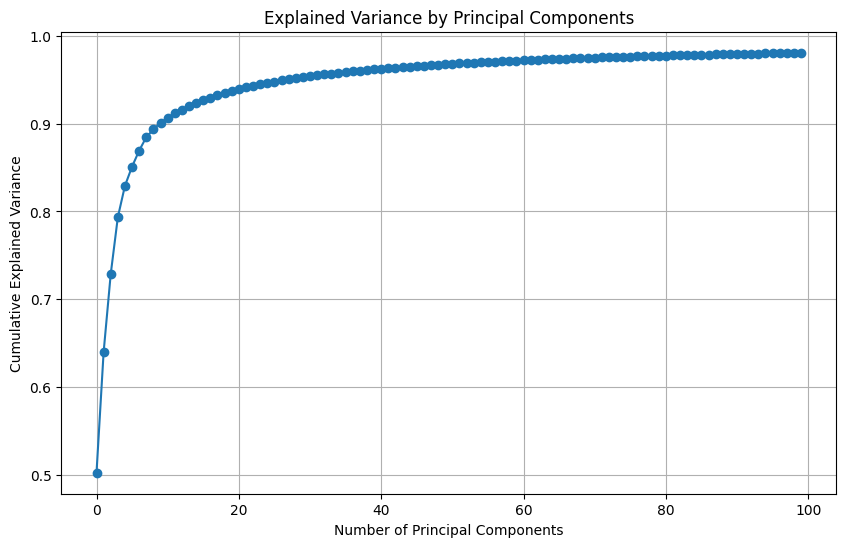

Number of components required to explain 95.0% variance: 28


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA on the dataset
def perform_pca(X, n_components=100):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    explained_variance_ratio = pca.explained_variance_ratio_
    
    return pca, explained_variance_ratio

# Perform PCA with 100 components 
n_components = 100
pca_model, explained_variance_ratio = perform_pca(X_gray, n_components=n_components)

# Plot the explained variance ratio
def plot_explained_variance(explained_variance_ratio):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance_ratio), marker='o')
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

# Call the function to plot explained variance
plot_explained_variance(explained_variance_ratio)

# Analyze how many dimensions are required to adequately represent image data
def analyze_explained_variance(explained_variance_ratio, threshold=0.95):
    cumulative_variance = np.cumsum(explained_variance_ratio)
    n_components_required = np.argmax(cumulative_variance >= threshold) + 1
    
    print(f'Number of components required to explain {threshold*100}% variance: {n_components_required}')
    return n_components_required

# Call the function to analyze the required number of components for 95% variance explanation
n_components_required = analyze_explained_variance(explained_variance_ratio, threshold=0.95)


After performing PCA on the dataset, we plotted the cumulative explained variance ratio of each principal component.

**28 components** are required to explain 95% of the variance in the data. This indicates that we can reduce the dimensionality of our dataset to 28 dimensions while retaining most of the information. By reducing the number of dimensions with PCA we can simplify the dataset, making it more manageable for  processing and classification tasks. This dimensionality reduction helps improve computational efficiency without a significant loss of information.


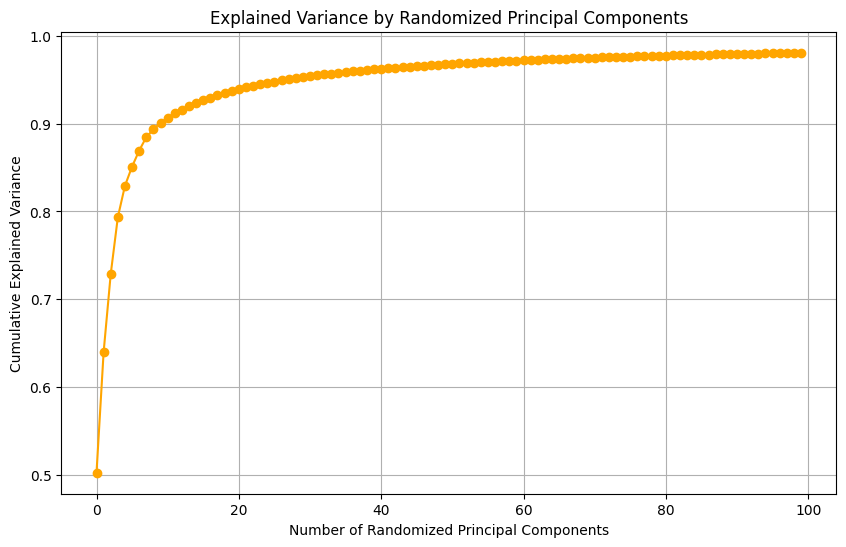

Number of components required to explain 95.0% variance: 28


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform Randomized PCA on the dataset
def perform_randomized_pca(X, n_components=100):
    pca = PCA(n_components=n_components, svd_solver='randomized')
    pca.fit(X)
    explained_variance_ratio = pca.explained_variance_ratio_
    
    return pca, explained_variance_ratio

# Perform Randomized PCA with 100 components 
n_components = 100
randomized_pca_model, randomized_explained_variance_ratio = perform_randomized_pca(X_gray, n_components=n_components)

# Plot the explained variance ratio for Randomized PCA
def plot_randomized_explained_variance(explained_variance_ratio):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance_ratio), marker='o', color='orange')
    plt.title('Explained Variance by Randomized Principal Components')
    plt.xlabel('Number of Randomized Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

# Call the function to plot explained variance for Randomized PCA
plot_randomized_explained_variance(randomized_explained_variance_ratio)

# Analyze how many dimensions are required to adequately represent image data with Randomized PCA
n_components_required_randomized = analyze_explained_variance(randomized_explained_variance_ratio, threshold=0.95)


The plot shows that **28 components** are required to explain 95% of the variance in the data using randomized PCA, similarly to PCA. The demensionality reduction functioned the same as PCA, though the method of calculation is different. As with PCA, we can greatly reduce the dimensionality of the dataset while retaining most of the information, and utilize the data in a more computationally efficient manner.


In [13]:
import time
import tracemalloc
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Function to perform PCA and return the reconstruction error
def perform_pca_and_reconstruction_error(X, n_components=28):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    return reconstruction_error

# Function to perform Randomized PCA and return the reconstruction error
def perform_randomized_pca_and_reconstruction_error(X, n_components=28):
    pca = PCA(n_components=n_components, svd_solver='randomized')
    X_reduced = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    return reconstruction_error

# Measure execution time and memory usage
def measure_performance(method, X, n_components):
    start_time = time.time()
    tracemalloc.start()
    
    if method == 'PCA':
        pca = PCA(n_components=n_components)
    elif method == 'Randomized PCA':
        pca = PCA(n_components=n_components, svd_solver='randomized')
    
    X_reduced = pca.fit_transform(X)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    end_time = time.time()
    
    execution_time = end_time - start_time
    memory_usage = peak / 10**6  # Convert to MB
    
    return execution_time, memory_usage, X_reduced

# Perform PCA and Randomized PCA with 28 components and calculate reconstruction errors
n_components = 28
pca_reconstruction_error = perform_pca_and_reconstruction_error(X_gray, n_components=n_components)
randomized_pca_reconstruction_error = perform_randomized_pca_and_reconstruction_error(X_gray, n_components=n_components)

# Measure performance for PCA
pca_time, pca_memory, X_pca_reduced = measure_performance('PCA', X_gray, n_components=28)
# Measure performance for Randomized PCA
randomized_pca_time, randomized_pca_memory, X_randomized_pca_reduced = measure_performance('Randomized PCA', X_gray, n_components=28)

# Print the reconstruction errors
print(f"PCA Reconstruction Error: {pca_reconstruction_error}")
print(f"Randomized PCA Reconstruction Error: {randomized_pca_reconstruction_error}")

# Print execution time and memory usage
print(f"PCA Execution Time: {pca_time:.4f} seconds")
print(f"PCA Memory Usage: {pca_memory:.2f} MB")
print(f"Randomized PCA Execution Time: {randomized_pca_time:.4f} seconds")
print(f"Randomized PCA Memory Usage: {randomized_pca_memory:.2f} MB")

# Plot the explained variance ratio for both methods
def plot_explained_variance_comparison(explained_variance_ratio_pca, explained_variance_ratio_randomized_pca):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance_ratio_pca), marker='o', label='PCA')
    plt.plot(np.cumsum(explained_variance_ratio_randomized_pca), marker='o', color='orange', label='Randomized PCA')
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.legend()
    plt.show()

# Perform PCA and Randomized PCA to get explained variance ratios
pca_model, explained_variance_ratio_pca = perform_pca(X_gray, n_components=100)
randomized_pca_model, explained_variance_ratio_randomized_pca = perform_randomized_pca(X_gray, n_components=100)

# Analysis and Conclusion
print("\nAnalysis and Conclusion:")
print(f"PCA Reconstruction Error: {pca_reconstruction_error}")
print(f"Randomized PCA Reconstruction Error: {randomized_pca_reconstruction_error}")

if pca_reconstruction_error < randomized_pca_reconstruction_error:
    print("PCA provides a better representation of the images with fewer components based on the reconstruction error.")
else:
    print("Randomized PCA provides a better representation of the images with fewer components based on the reconstruction error.")

print("Both methods show similar explained variance ratios, but the reconstruction error provides a\nquantitative measure of the representation quality.")
print(f"PCA Execution Time: {pca_time:.4f} seconds")
print(f"PCA Memory Usage: {pca_memory:.2f} MB")
print(f"Randomized PCA Execution Time: {randomized_pca_time:.4f} seconds")
print(f"Randomized PCA Memory Usage: {randomized_pca_memory:.2f} MB")

PCA Reconstruction Error: 104.84164474232719
Randomized PCA Reconstruction Error: 104.84038352580396
PCA Execution Time: 10.7381 seconds
PCA Memory Usage: 1069.21 MB
Randomized PCA Execution Time: 11.3434 seconds
Randomized PCA Memory Usage: 1069.21 MB

Analysis and Conclusion:
PCA Reconstruction Error: 104.84164474232719
Randomized PCA Reconstruction Error: 104.84038352580396
Randomized PCA provides a better representation of the images with fewer components based on the reconstruction error.
Both methods show similar explained variance ratios, but the reconstruction error provides a
quantitative measure of the representation quality.
PCA Execution Time: 10.7381 seconds
PCA Memory Usage: 1069.21 MB
Randomized PCA Execution Time: 11.3434 seconds
Randomized PCA Memory Usage: 1069.21 MB


PCA has a lower reconstruction error, and is known to maintain the best possible projection of the data compared to randomized PCA. However, even though the speed is negligibly different here, randomized PCA would be faster for larger datasets. 

For our dataset, because of the slightly better representation quality of PCA, it is preferable. However, if our dataset were to be larger, randomized PCA may have been the better choice if the difference in speed was significant.

## DAISY Feature Extraction

The next section uses DAISY feature extraction on grayscale images and visualizing the closest matching images. First we make sure that all of the images are sized (128x128) and then apply the DAISY descriptor to extract texture related features. On the features are extracted for the images, a pairwise distance matrix is computed, representing how similar each image is to the others based on DAISY features. 

We then test and image and its closest match using the distance matrix. 

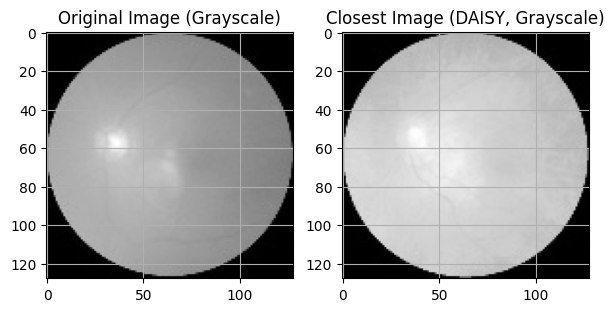

In [11]:
# DAISY Feature Extraction 
from skimage.feature import daisy
import matplotlib.pyplot as plt
import numpy as np
import copy

# h, w are the image dimensions
h, w = 128, 128

# extract DAISY features 
def extract_daisy_features(images, img_shape):
    features_list = []
    for img in images:
        reshaped_img = img.reshape(img_shape)
        features = daisy(reshaped_img, step=10, radius=20, rings=2, histograms=8, orientations=8, visualize=False)
        features_list.append(features.reshape(-1))  # Flatten features
    return np.array(features_list)

# Apply DAISY to the grayscale dataset
daisy_features = extract_daisy_features(X_gray, (h, w))

# Calculate pairwise distances between DAISY features
from sklearn.metrics import pairwise_distances
dist_matrix_daisy = pairwise_distances(daisy_features)

# Find and visualize the closest image using DAISY features
idx1 = 30  # Index of the target image to compare
distances = copy.deepcopy(dist_matrix_daisy[idx1, :])
distances[idx1] = np.inf  # Avoid selecting the same image
idx2 = np.argmin(distances)

plt.figure(figsize=(7, 10))
plt.subplot(1, 2, 1)
plt.imshow(X_gray[idx1].reshape((h, w)), cmap='gray')
plt.title("Original Image (Grayscale)")
plt.grid()

plt.subplot(1, 2, 2)
plt.imshow(X_gray[idx2].reshape((h, w)), cmap='gray')
plt.title("Closest Image (DAISY, Grayscale)")
plt.grid()
plt.show()

## DAISY Analysis

Below we choose to use a (KNN) classifier to classify the images based on DAISY features.The KNN classifier is trained on the DAISY features from the training set. Once trained, the model then predicts labels for the test set. Once the KNN classifier is trained and used to predict the test set we then need a way to view the performance of the classifier. We do this by evaluating several metrics including the accuracy, a detailed classification report, and a confusion matrix. The confusion matrix is particularly insteresting as we can use it to visually represent which images were inaccurately classified and which of the four classifactions it was innacuartely assigned to.

Daisy Features Overall Accuracy: 81.34%
Classification Report:
                       precision    recall  f1-score   support

              Normal       0.87      0.87      0.87       194
Diabetic Retinopathy       0.95      0.95      0.95       225
            Cataract       0.74      0.65      0.69       179
            Glaucoma       0.69      0.76      0.72       206

            accuracy                           0.81       804
           macro avg       0.81      0.81      0.81       804
        weighted avg       0.81      0.81      0.81       804



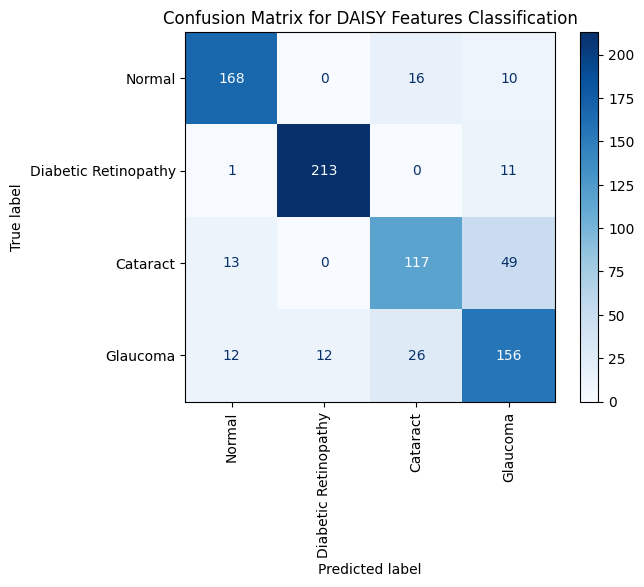

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train the KNN classifier and get predictions
knn_daisy = KNeighborsClassifier(n_neighbors=1)
daisy_train, daisy_test, y_train, y_test = train_test_split(daisy_features, y, test_size=0.2, train_size=0.8)
knn_daisy.fit(daisy_train, y_train)
y_pred = knn_daisy.predict(daisy_test)

acc_daisy = accuracy_score(y_test, y_pred)
print(f"Daisy Features Overall Accuracy: {100*acc_daisy:.2f}%")

# Use Classification report for detailed category performance
report = classification_report(y_test, y_pred, target_names=['Normal', 'Diabetic Retinopathy', 'Cataract', 'Glaucoma'])
print("Classification Report:\n", report)

# Confusion matrix made to better understand what categories are being missclassified. 
cm = confusion_matrix(y_test, y_pred, labels=knn_daisy.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Diabetic Retinopathy', 'Cataract', 'Glaucoma'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for DAISY Features Classification")
plt.xticks(rotation=90)
plt.show()

## Result of Classifier Report and Confusion Matrix

The classification report shows that the model has an overall accuracy of about 81%. The model is better at classifying  Diabetic Retinopathy and Normal images, but, it struggles more with Cataract and Glaucoma, showing lower accuarcy, particularly for Cataract. 

The specific ammount of errors can be seen in the Confusion matrix with Cataract and Glaucoma images frequently confused with each other, with Cataract images misclassified as Glaucoma and vice versa. Whereas Normal and Diabetic Retinopathy have far less errors.


## Exceptional Work

### HOG Feature Extraction

HOG Features Overall Accuracy: 76.99%
HOG Features Classification Report:
                       precision    recall  f1-score   support

              Normal       0.64      0.79      0.71       175
Diabetic Retinopathy       1.00      0.97      0.98       213
            Cataract       0.70      0.54      0.61       194
            Glaucoma       0.73      0.76      0.75       222

            accuracy                           0.77       804
           macro avg       0.77      0.77      0.76       804
        weighted avg       0.77      0.77      0.77       804



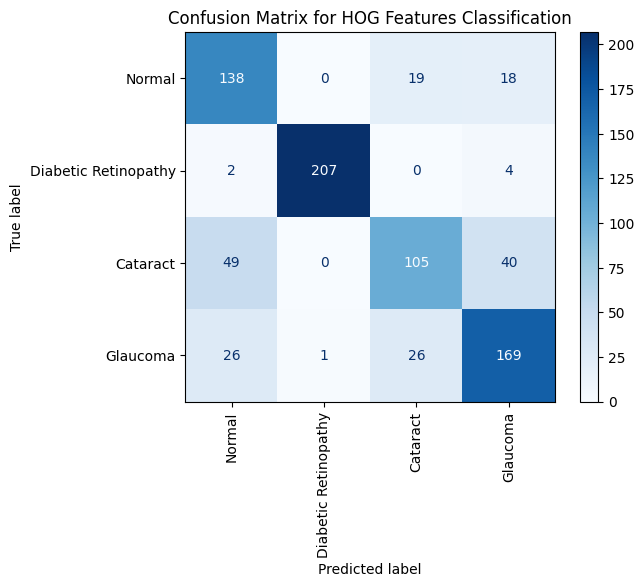

In [15]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

# Function to extract HOG features from images
def extract_hog_features(images, img_shape):
    features_list = []
    for img in images:
        reshaped_img = img.reshape(img_shape)
        features, hog_image = hog(reshaped_img, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
        features_list.append(features)
    return np.array(features_list)

# Extract HOG features for grayscale images
hog_features = extract_hog_features(X_gray, (h, w))

# Normalize HOG features
scaler = StandardScaler()
hog_features_normalized = scaler.fit_transform(hog_features)

# Split HOG features dataset into training and testing sets
hog_train, hog_test, y_train_hog, y_test_hog = train_test_split(hog_features_normalized, y, test_size=0.2, train_size=0.8)

# Train KNN classifier with HOG features
knn_hog = KNeighborsClassifier(n_neighbors=1)
knn_hog.fit(hog_train, y_train_hog)
y_pred_hog = knn_hog.predict(hog_test)

# Calculate accuracy for HOG features
acc_hog = accuracy_score(y_test_hog, y_pred_hog)
print(f"HOG Features Overall Accuracy: {100*acc_hog:.2f}%")

# Classification report for HOG features
report_hog = classification_report(y_test_hog, y_pred_hog, target_names=['Normal', 'Diabetic Retinopathy', 'Cataract', 'Glaucoma'])
print("HOG Features Classification Report:\n", report_hog)

# Confusion matrix for HOG features
cm_hog = confusion_matrix(y_test_hog, y_pred_hog, labels=knn_hog.classes_)
disp_hog = ConfusionMatrixDisplay(confusion_matrix=cm_hog, display_labels=['Normal', 'Diabetic Retinopathy', 'Cataract', 'Glaucoma'])
disp_hog.plot(cmap='Blues')
plt.title("Confusion Matrix for HOG Features Classification")
plt.xticks(rotation=90)
plt.show()

HOG performs worse than daisy (76% < 81%) in terms of accuracy.

The Histogram of Oriented Gradients method is less accurate than DAISY in some image analysis tasks due to differences in their feature extraction approaches. HOG focuses on capturing edge directions by dividing the image into cells and calculating gradients,and may not always capture finer details or local variations in texture as effectively.

DAISY is designed to be more robust to local deformations and variations by using dense local descriptors. This additional robustness allows DAISY to handle complex patterns and variations in the image more effectively than HOG, resulting in a slight improvement in accuracy.

### PCA on DAISY Features

In [32]:
from sklearn.decomposition import PCA

# Reduce dimensionality of DAISY features
pca = PCA(n_components=28)  # With minimum number of components to explain 95% of variance 
daisy_train_pca = pca.fit_transform(daisy_train)
daisy_test_pca = pca.transform(daisy_test)

knn_daisy.fit(daisy_train_pca, y_train)
y_pred = knn_daisy.predict(daisy_test_pca)
acc_daisy = accuracy_score(y_test, y_pred)
print(f"Daisy Features Overall Accuracy with PCA: {100*acc_daisy:.2f}%")

Daisy Features Overall Accuracy with PCA: 82.09%


Performance is almost ~.75% better with PCA applied to reduce dimensionality using the minimum number of components to explain 95% of variance calculated earlier. This slight improvement may be to PCA combatting the overfitting that can occur with DAISY feature extraction.

In [33]:
from sklearn.decomposition import PCA

# Reduce dimensionality of DAISY features
pca = PCA(n_components=50)  # 50 componenets
daisy_train_pca = pca.fit_transform(daisy_train)
daisy_test_pca = pca.transform(daisy_test)

knn_daisy.fit(daisy_train_pca, y_train)
y_pred = knn_daisy.predict(daisy_test_pca)
acc_daisy = accuracy_score(y_test, y_pred)
print(f"Daisy Features Overall Accuracy with PCA: {100*acc_daisy:.2f}%")


Daisy Features Overall Accuracy with PCA: 82.21%


The best of the 3 tests, performance with 50 components results in almost 1% improvement in accuracy. This likely would be a good comprimise between performance and computational efficiency going forward on this dataset. 

In [34]:
from sklearn.decomposition import PCA

# Reduce dimensionality of DAISY features
pca = PCA(n_components=100)  # 100 components
daisy_train_pca = pca.fit_transform(daisy_train)
daisy_test_pca = pca.transform(daisy_test)

knn_daisy.fit(daisy_train_pca, y_train)
y_pred = knn_daisy.predict(daisy_test_pca)
acc_daisy = accuracy_score(y_test, y_pred)
print(f"Daisy Features Overall Accuracy with PCA: {100*acc_daisy:.2f}%")

Daisy Features Overall Accuracy with PCA: 81.59%


This test is not is more computationally expensive, but it also perfomed worse accuracy wise than the previous 2 tests. The 100 components is likely reintroducing some noise and leading to a higher instance of overfitting.